## Problem 1
---

In [2]:
from qiskit import QuantumCircuit

circuit = QuantumCircuit(4)

circuit.h(range(4)) # Applying Hadamard on all four Qubits
circuit.cx(2, 3)
circuit.cx(3, 1)
circuit.h(range(3))

circuit.draw()

┌───┐┌───┐          
q_0: ┤ H ├┤ H ├──────────
     ├───┤└───┘┌───┐┌───┐
q_1: ┤ H ├─────┤ X ├┤ H ├
     ├───┤     └─┬─┘├───┤
q_2: ┤ H ├──■────┼──┤ H ├
     ├───┤┌─┴─┐  │  └───┘
q_3: ┤ H ├┤ X ├──■───────
     └───┘└───┘

## Problem 2
---

In [3]:
from qiskit.quantum_info import Statevector

plus = Statevector.from_label('+')
minus = Statevector.from_label('-')

plusminus = plus.tensor(minus) # Generating |+>|->
plusminus_twice = plusminus.tensor(plusminus) # Generating |+>|->|+>|-> = |+-+->

plusminus_twice.draw("latex")

<IPython.core.display.Latex object>

Applying the circuit from Problem 1, 

In [4]:
plusminus_twice.evolve(circuit).draw('latex')

<IPython.core.display.Latex object>

We don't really need to plot a histogram of the probabilities for each eigenvector -- we can see clearly they are all 1/8th. But let's do it anyway. 

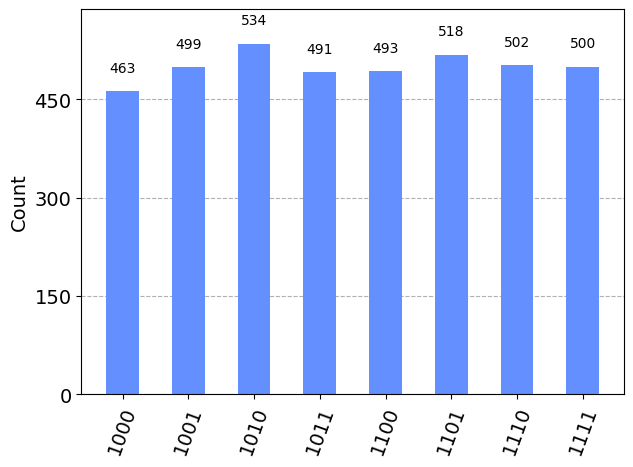

In [5]:
from qiskit.visualization import plot_histogram

results = plusminus_twice.evolve(circuit).sample_counts(4000)
plot_histogram(results)

From 4000 sample runs, we get a rough 500 yields for each eigenvector -- a 1/8th probability. 

## Problem 3
---

Let's add the measurement gates to the circuit from Problem 1

In [6]:
circuit = QuantumCircuit(4)

circuit.h(range(4)) # Applying Hadamard on all four Qubits
circuit.cx(2, 3)
circuit.cx(3, 1)
circuit.h(range(3))

circuit.measure_all() # Apply a measurement gate on all four Qubits
                      # Stores the results as classical bits
                      # Notice how we did not specify any classical wire 
                      # Calling .measure() automatically produced appropriate classical wires
                      # to store the results

circuit.draw()

┌───┐┌───┐           ░ ┌─┐         
   q_0: ┤ H ├┤ H ├───────────░─┤M├─────────
        ├───┤└───┘┌───┐┌───┐ ░ └╥┘┌─┐      
   q_1: ┤ H ├─────┤ X ├┤ H ├─░──╫─┤M├──────
        ├───┤     └─┬─┘├───┤ ░  ║ └╥┘┌─┐   
   q_2: ┤ H ├──■────┼──┤ H ├─░──╫──╫─┤M├───
        ├───┤┌─┴─┐  │  └───┘ ░  ║  ║ └╥┘┌─┐
   q_3: ┤ H ├┤ X ├──■────────░──╫──╫──╫─┤M├
        └───┘└───┘           ░  ║  ║  ║ └╥┘
meas: 4/════════════════════════╩══╩══╩══╩═
                                0  1  2  3

Let's use sampler to visualize the probabilities resulting from this circuit. 

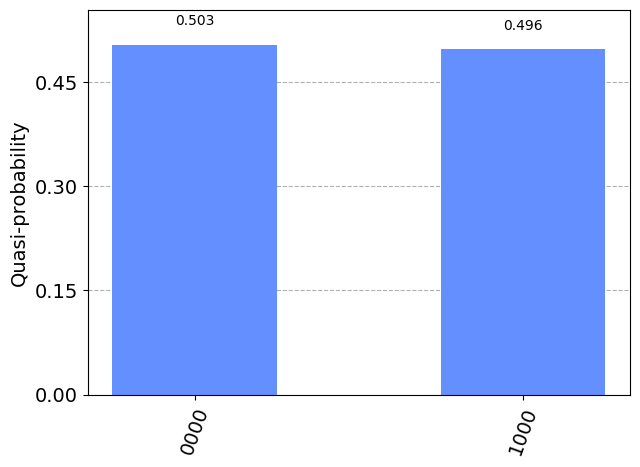

In [11]:
from qiskit.primitives import Sampler

sampler = Sampler() # initilialize Sampler
job = sampler.run(circuit, shots = 4000) # 4000 samples
results = job.result()

statistics = results.quasi_dists[0].binary_probabilities()

plot_histogram(statistics)